In [2]:
%pylab inline
from pandas import read_csv

Populating the interactive namespace from numpy and matplotlib


In [124]:
medicare = read_csv("small.csv", header = True)
x = iter([i for i in range(100,1000)])

In [235]:
medicare.ix[x.__next__()]

npi                                                                        1003052788
nppes_provider_last_org_name                                                    ANESI
nppes_provider_first_name                                                     STEPHEN
nppes_provider_mi                                                                   D
nppes_credentials                                                                M.D.
nppes_provider_gender                                                               M
nppes_entity_code                                                                   I
nppes_provider_street1                                             5 CAMBRIDGE CENTER
nppes_provider_street2                                                      8TH FLOOR
nppes_provider_city                                                         CAMBRIDGE
nppes_provider_zip                                                               2142
nppes_provider_state                                  

In [217]:
len(medicare)

2997

In [233]:
import re
re.match("\$(\d*,*\d*\.\d\d)","$1,2.32").group(1)

'1,2.32'

In [216]:
float(medicare["average_Medicare_allowed_amt"][0][1:])
float(medicare["average_submitted_chrg_amt"][0][1:])
float(medicare["average_Medicare_payment_amt"][0][1:])

115.52

In [250]:
avg_allowed = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_Medicare_allowed_amt"][i][1:]
    if(len(s)>6):
        #print(medicare["provider_type"][i], medicare["hcpcs_description"][i])
        #print(s[:len(s)-7]+s[len(s)-6:])
        avg_allowed[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_allowed[i] = float(s)
        

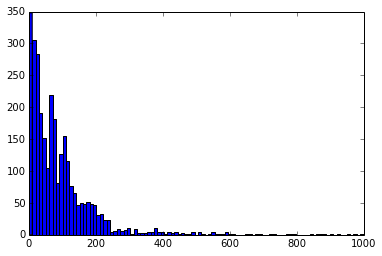

In [247]:
hist(avg_allowed, bins = linspace(0,1000,100));

In [265]:
avg_submit = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_submitted_chrg_amt"][i][1:]
    if(len(s)>6):
        avg_submit[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_submit[i] = float(s)
avg_payment = array([0 for i in range(len(medicare))])
for i in range(len(medicare)):
    s = medicare["average_Medicare_payment_amt"][i][1:]
    if(len(s)>6):
        avg_payment[i] = float(s[:len(s)-7]+s[len(s)-6:])
    else:
        avg_payment[i] = float(s)

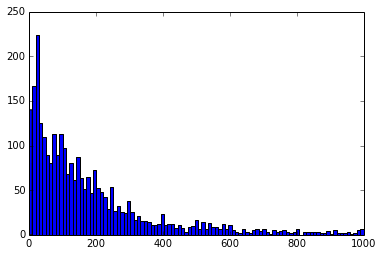

In [252]:
hist(avg_submit, bins = linspace(0,1000,100));

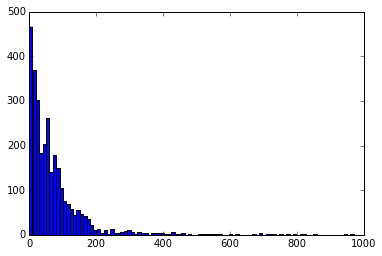

In [266]:
hist(avg_payment, bins = linspace(0,1000,100));

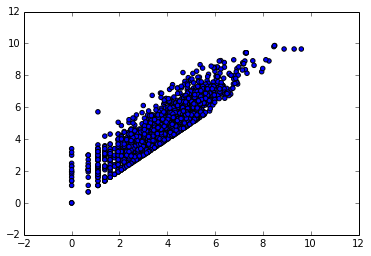

In [262]:
scatter(log(avg_allowed),log(avg_submit))

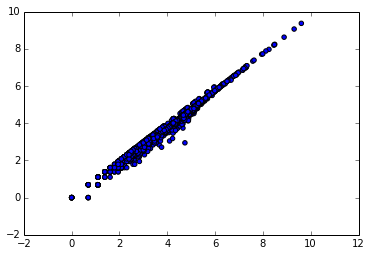

In [269]:
scatter(log(avg_allowed),log(avg_payment))

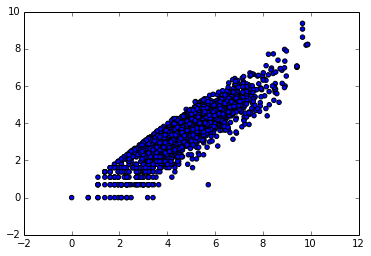

In [270]:
scatter(log(avg_submit),log(avg_payment))

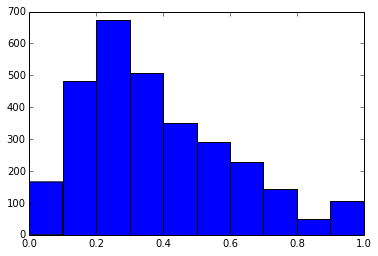

In [287]:
x = avg_payment/avg_submit

import pandas as pd
x  = pd.Series(x).dropna()
hist(x);

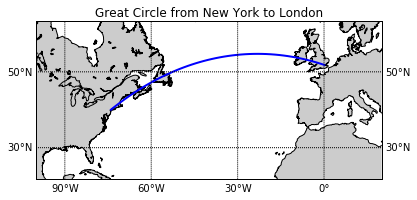

In [3]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Great Circle from New York to London')
plt.show()